In [0]:
from google.colab import drive
drive.mount('/content/drive/')

In [22]:
%cd /content/drive/My\ Drive/HackerEarth Deep Learning/

/content/drive/My Drive/HackerEarth Deep Learning


In [23]:
!ls

 9d34462453e311ea.zip  'Deep Learning.ipynb'   submission.csv
 dataset	        Resnet.h5	       Task.ipynb


In [0]:
!unzip 9d34462453e311ea.zip

In [4]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import glob
from tqdm import tqdm
import seaborn as sns
from keras.preprocessing.image import img_to_array,load_img

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#**Visualize**

In [0]:
train_df = pd.read_csv('train.csv')

In [0]:
test_df = pd.read_csv('test.csv')

In [18]:
train_df.tail()

,Image,Class
5978,image2494.jpg,Food
5979,image8015.jpg,Attire
5980,image4975.jpg,Food
5981,image1222.jpg,Food
5982,image9635.jpg,Attire


In [11]:
train_df['Class'].value_counts()

Food                    2278
Attire                  1691
misc                    1271
Decorationandsignage     743
Name: Class, dtype: int64

In [12]:
train_df.index

RangeIndex(start=0, stop=5983, step=1)

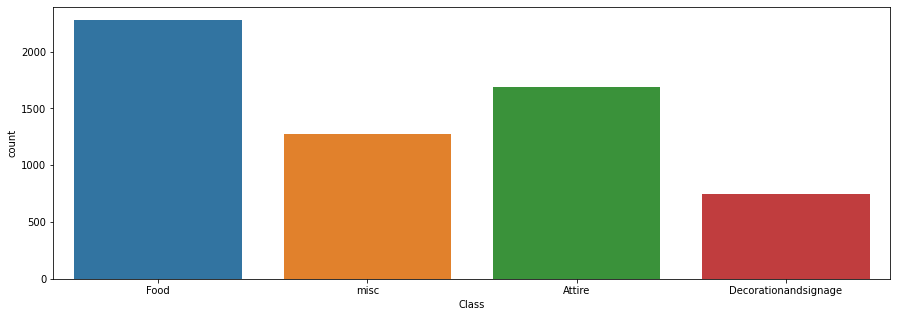

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(x=train_df['Class'])

In [0]:
def image(file_path):
  img = cv.imread(file_path)
  img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)
  return cv.resize(img_rgb,(64,64),cv.INTER_CUBIC)

#**Train Data**

In [0]:
m = 5983
X = np.ndarray(shape=(m,64,64,3),dtype = np.float32)
y = np.zeros(shape=(m,4))

In [20]:
path = '/content/drive/My Drive/HackerEarth Deep Learning/dataset/Train Images/image2494.jpg'
label = train_df[train_df['Image']==path.split('/')[-1]]['Class'].iloc[0]
print(label)

Food


In [21]:
path = '/content/drive/My Drive/HackerEarth Deep Learning/dataset/Train Images/*.*'

for i,path in tqdm(enumerate(glob.glob(path))):
  img = image(path)
  X[i,:] = np.squeeze(img.reshape(64,64,3))

  label = train_df[train_df['Image']==path.split('/')[-1]]['Class'].iloc[0]

  if(label=='Food'):
    y[i,0] = 1

  elif(label=='Attire'):
    y[i,1] = 1

  elif(label=='misc'):
    y[i,2] = 1

  elif(label=='Decorationandsignage'):
    y[i,3] = 1    
   

5983it [25:44,  3.87it/s]


In [26]:
X[0].dtype

dtype('float32')

In [0]:
np.save('train_data.npy',X,allow_pickle=True)
np.save('train_label_data.npy',y,allow_pickle=True)

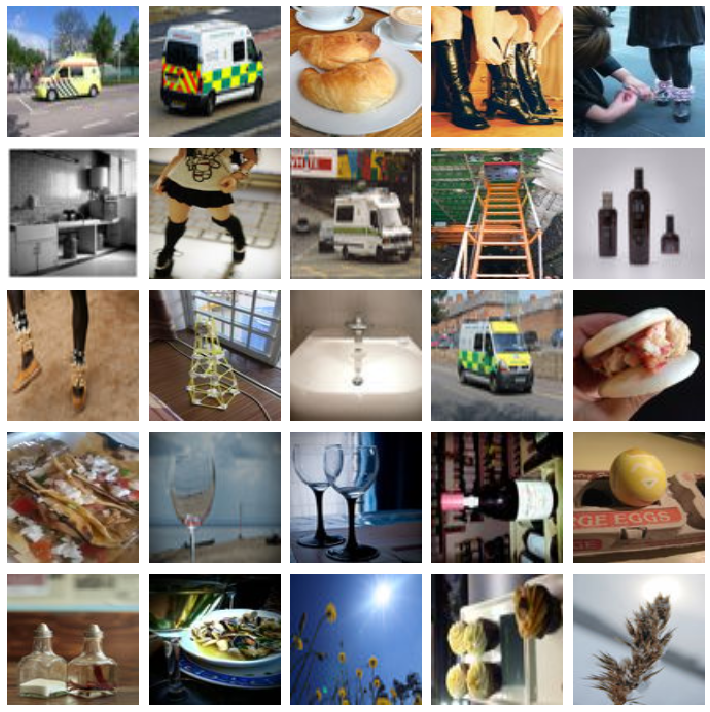

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X[i])
  plt.axis('off')

plt.tight_layout()  
  

#**Test Data**

In [28]:
test_df.head()

,Image
0,image6245.jpg
1,image10409.jpg
2,image8692.jpg
3,image10517.jpg
4,image2580.jpg


In [25]:
test_df.index

RangeIndex(start=0, stop=3219, step=1)

In [0]:
n = 3219
X_test = np.ndarray(shape=(n,64,64,3),dtype=np.float32)

In [29]:
path2 = '/content/drive/My Drive/HackerEarth Deep Learning/dataset/Test Images/'
for i,img in tqdm(enumerate(test_df['Image'])):

  path2_new = path2+img

  img = image(path2_new)
  X_test[i,:] = np.squeeze(img.reshape(64,64,3))


3219it [11:41,  4.59it/s]


In [0]:
X_test.shape

(3219, 224, 224, 3)

In [0]:
np.save('test_data.npy',X_test,allow_pickle=True)

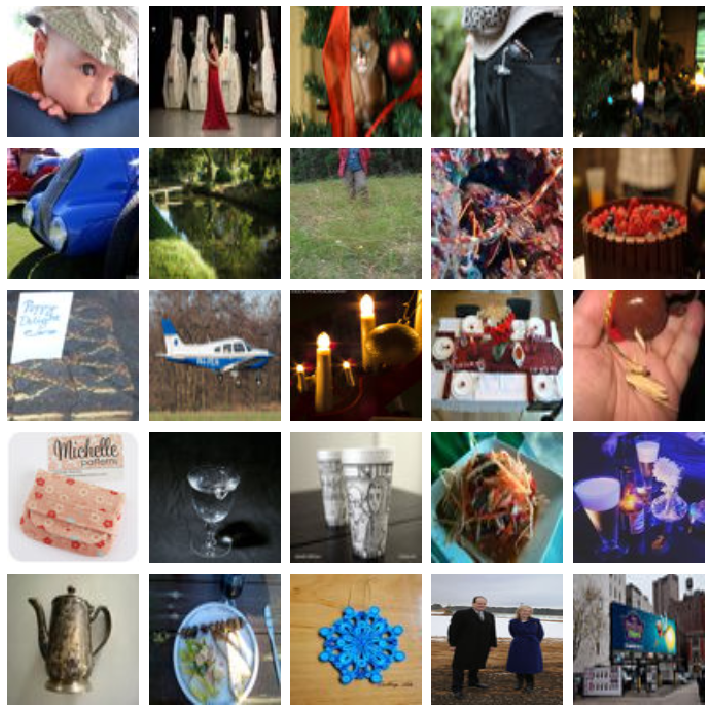

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_test[i])
  plt.axis('off')

plt.tight_layout()  
  

#**Code Check**

In [0]:
# X_test = np.ndarray(shape=(5,224,224,3),dtype=np.uint8)
# path2 = '/content/drive/My Drive/HackerEarth Deep Learning/dataset/Test Images/'
# for i,img in tqdm(enumerate(test_df['Image'])):

#   path2_new = path2+img

#   img = image(path2_new)
#   X_test[i] = img

#   if(i==4):
#     break



0it [00:00, ?it/s]


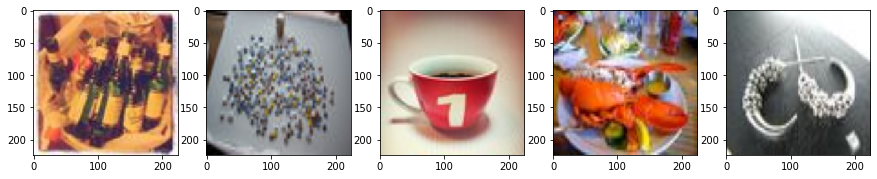

In [0]:
# plt.figure(figsize=(15,5))
# for i in range(5):
#   plt.subplot(1,5,i+1)
#   plt.imshow(X_test[i])

In [0]:
test_df.head()

,Image
0,image6245.jpg
1,image10409.jpg
2,image8692.jpg
3,image10517.jpg
4,image2580.jpg


In [0]:
# po = []
# path = '/content/drive/My Drive/HackerEarth Deep Learning/dataset/Train Images/*.*'

# for i,path in tqdm(enumerate(glob.glob(path))):
#   label = train_df[train_df['Image']==path.split('/')[-1]]['Class'].iloc[0]
#   po.append(label)

#   if(i==19):
#     break


0it [00:00, ?it/s]


In [0]:
# print(po)

['misc', 'misc', 'misc', 'Attire', 'Attire', 'misc', 'misc', 'misc', 'misc', 'Attire', 'Attire', 'misc', 'misc', 'misc', 'Food', 'Food', 'Food', 'Food', 'Food', 'Food']


In [0]:
# print(y)

[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [0]:
# X[-2].shape

(128, 128, 3)

In [0]:
nm ='/content/drive/My Drive/HackerEarth Deep Learning/dataset/Train Images/image10892.jpg'
print( train_df[ train_df['Image']== nm.split('/')[-1] ]['Class'].iloc[0] )

misc


In [0]:
X_test[0]

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,  64],
        ...,
        [105, 111, 120],
        [ 81, 107, 103],
        [ 77,  71,  99]],

       [[ 67,  65,  67],
        [ 81,  78, 109],
        [ 84,  74, 103],
        ...,
        [ 67, 111,  81],
        [ 65,  52,  77],
        [ 82, 121,  67]],

       [[ 74, 111, 102],
        [103,  67,  68],
        [ 54, 103,  77],
        ...,
        [ 68, 109, 102],
        [ 57,  54,  77],
        [ 74, 113, 112]],

       ...,

       [[ 82,  79,  78],
        [116,  50,  97],
        [112,  70, 108],
        ...,
        [ 78, 102,  74],
        [ 88,  52,  51],
        [ 54,  52,  72]],

       [[ 87,  57, 115],
        [ 73,  90,  80],
        [113,  81,  67],
        ...,
        [ 81, 117,  57],
        [ 78, 108,  65],
        [ 83, 113,  83]],

       [[121, 103,  70],
        [ 68,  90,  55],
        [ 88,  78,  97],
        ...,
        [ 50, 107, 107],
        [ 43, 118,  54],
        [112,  80,  50]]